In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use(['science', 'notebook', 'grid'])
from scipy.constants import mu_0

**Fitting curve**

In [2]:
fitting_func = lambda x, m, c : m*x+c
x_fit = np.linspace(0.0, 1.6, 1000)

---
**Table 1: Constants of anchor ring**

In [3]:
constants_anch_ring_tab1 = pd.DataFrame({
                                    'Mean dia of core of ring D1 (in cm)' : 3.6,
                                    'Mean dia of anchor ring D (in cm)' : 25.7,
                                    'Total no of turns in the ring (N1)' : [970, 840],
                                    'No of turns per cm of ring n1' : [12.01, 10.4],
                                    'No of secondary turns on the ring(n2)': 5
                                    })
constants_anch_ring_tab1

,Mean dia of core of ring D1 (in cm),Mean dia of anchor ring D (in cm),Total no of turns in the ring (N1),No of turns per cm of ring n1,No of secondary turns on the ring(n2)
0,3.6,25.7,970,12.01,5
1,3.6,25.7,840,10.40,5


---
**Table 2: Constants of standard solenoid**

In [4]:
constants_of_solenoid_tab2 = pd.DataFrame({
                                    'Length of solenoid (P1P2) L (in cm)' : [100],
                                    'Total no of primary turns N2' : 536,
                                    'No of p-coil turns per cm n3 = N2/L' : 536/100,
                                    'Total no of turns in s2 (n4)' : 10000,
                                    'Mean diameter of priamary D2 (in cm)' : 5
                                    })
constants_of_solenoid_tab2

,Length of solenoid (P1P2) L (in cm),Total no of primary turns N2,No of p-coil turns per cm n3 = N2/L,Total no of turns in s2 (n4),Mean diameter of priamary D2 (in cm)
0,100,536,5.36,10000,5


---
**Table 3: Data for I-d graph**

In [5]:
current_tab3 = np.array([0.3, 0.7, 0.9, 1.2, 1.5])
throw_plus_to_minus_tab3 = np.array([0.3, 0.6, 0.9, 1.1, 1.4])
throw_minus_to_plus_tab3 = np.array([0.3, 0.6, 0.8, 1.1, 1.3])

ID_table3 = pd.DataFrame({
                        'Current (in A)': current_tab3,
                        '+I to -I throw(cm)' : throw_plus_to_minus_tab3,
                        '-I to +I throw(cm)' : throw_minus_to_plus_tab3
                        })
ID_table3['Mean d(cm)'] = (ID_table3['+I to -I throw(cm)'] + 
                           ID_table3['-I to +I throw(cm)'])/2
ID_table3

,Current (in A),+I to -I throw(cm),-I to +I throw(cm),Mean d(cm)
0,0.3,0.3,0.3,0.30
1,0.7,0.6,0.6,0.60
2,0.9,0.9,0.8,0.85
3,1.2,1.1,1.1,1.10
4,1.5,1.4,1.3,1.35


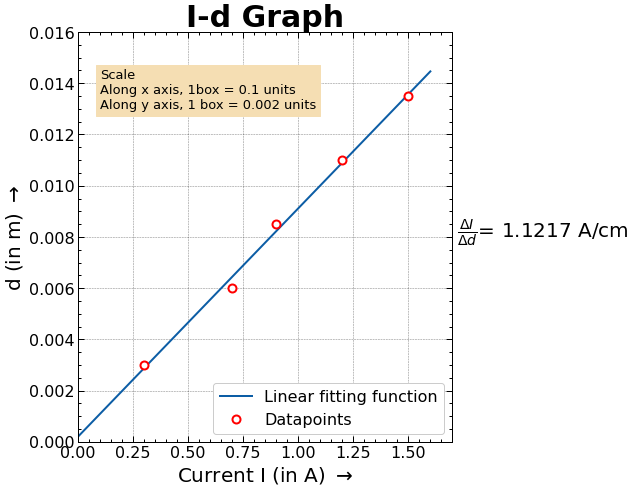

In [6]:
plt.figure(figsize=(9, 7))
popt, pcov = curve_fit(f=fitting_func, xdata=current_tab3, 
                       ydata=(ID_table3['Mean d(cm)']*0.01).values)
plt.plot(x_fit, fitting_func(x_fit, *popt), '-', label = 'Linear fitting function')
plt.plot(current_tab3, (ID_table3['Mean d(cm)']*0.01).values, 'ro', markerfacecolor = 'w',
        markersize = 8, markeredgewidth = 2, label = 'Datapoints')
plt.xlabel(r'Current I (in A) $\rightarrow$', fontsize = 20)
plt.ylabel(r'd (in m) $\rightarrow$', fontsize = 20)
plt.xlim(0, 1.7), plt.ylim(0, 0.016)
plt.title('I-d Graph', fontsize = 30, fontweight = 'bold')
scale = 'Scale\nAlong x axis, 1box = 0.1 units\nAlong y axis, 1 box = 0.002 units'
plt.text(0.1, 0.013, s = scale, fontsize = 13, backgroundcolor = 'wheat')
derivative_text = r'$\frac{\Delta I}{\Delta d}$'
slope_text = f'{derivative_text}= {round(1/popt[0]*0.01, 4)} A/cm'
plt.text(1.72, 0.008, slope_text, fontsize = 20)
plt.tight_layout()
plt.legend(loc = 4)
plt.savefig('I-D Curve.jpg')

In [7]:
print(f'Slope of curve = {popt[0]}', f'Intercept of curve = {popt[1]}', 
      f'change in I/change in d = {1/popt[0]} A/m',
      f'change in I/change in d = {1/popt[0] * 0.01} A/cm',sep = '\n')

Slope of curve = 0.00891509446331364
Intercept of curve = 0.00019811307171576219
change in I/change in d = 112.16931061303767 A/m
change in I/change in d = 1.1216931061303768 A/cm


---
**Table 4: Table for Saturation Current**

In [8]:
initial_current_T4 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1.0, 1.1, 
                            1.2, 1.3, 1.4, 1.5])

final_current_T4 = -initial_current_T4

first_throw_T4 = np.array([0.5, 2.6, 5.7, 8.5, 10.6, 14.0, 16.6, 17.5, 18.3, 
                        19.1, 19.6, 19.8, 20.2])

saturation_current_T4 = 1.2

saturation_current_table4 = pd.DataFrame({
                                        'Initial Current(in A)' : initial_current_T4,
                                        'Final Current(in A)' : final_current_T4,
                                        'First throw(in cm)' : first_throw_T4
                                        })
saturation_current_table4.head()

,Initial Current(in A),Final Current(in A),First throw(in cm)
0,0.1,-0.1,0.5
1,0.2,-0.2,2.6
2,0.3,-0.3,5.7
3,0.4,-0.4,8.5
4,0.5,-0.5,10.6


---
**Table 5: Determination of m**

In [9]:
m_tab5 = pd.DataFrame({
                        'n3 (cm^-1)' : [5.36],
                        'n4' : 1000,
                        'n2' : 5,
                        'D2 (cm)' : 5,
                        'D1 (cm)' : 3.6
                         })

Id_slope = (1/popt[0]) * 0.01 # in A/cm

m_val = (2*mu_0*m_tab5['n3 (cm^-1)']*m_tab5['n4']/m_tab5['n2'])*(m_tab5['D2 (cm)']/
                                                                m_tab5['D1 (cm)'])**2 * Id_slope * 10**4 

m_tab5['I/d (A/cm)'] = Id_slope
m_tab5['m (in T/m)'] = m_val

In [10]:
m_tab5

,n3 (cm^-1),n4,n2,D2 (cm),D1 (cm),I/d (A/cm),m (in T/m)
0,5.36,1000,5,5,3.6,1.121693,58.296664


---
**Table 6: Table for initial H and B**

In [11]:
initial_current_T6 = np.array([1.2, 1.2, 1.2])
final_current_T6 = -initial_current_T6
throw_T6 = np.array([19.7, 19.8, 19.7])

n1 = 10.4 # cm^-1
m = m_val.values # T/m
I1 = 1.2

initial_HB_tab6 = pd.DataFrame({
                                'Initial Current I1 (A)' : initial_current_T6,
                                'Final Current -I1 (A)' : final_current_T6,
                                'Ballistic throw d1 (cm)' : throw_T6
                               })
initial_HB_tab6['Mean d1 (cm)'] = initial_HB_tab6['Ballistic throw d1 (cm)'].mean()
initial_HB_tab6['Mean d1 (m)'] = initial_HB_tab6['Mean d1 (cm)']*0.01
initial_HB_tab6['H1 (A/m)'] = I1*n1*100
initial_HB_tab6['B1 = m*d1/2'] = m*initial_HB_tab6['Mean d1 (m)']/2
initial_HB_tab6

,Initial Current I1 (A),Final Current -I1 (A),Ballistic throw d1 (cm),Mean d1 (cm),Mean d1 (m),H1 (A/m),B1 = m*d1/2
0,1.2,-1.2,19.7,19.733333,0.197333,1248.0,5.751938
1,1.2,-1.2,19.8,19.733333,0.197333,1248.0,5.751938
2,1.2,-1.2,19.7,19.733333,0.197333,1248.0,5.751938


---
**Table 7: sebsequent H and B**

In [12]:
n1 = 10.4 # cm^-1
m = m_val.values # T/m
I1 = 1.2
B1 = initial_HB_tab6['B1 = m*d1/2'].unique()

subsequent_data_tab7 = pd.read_csv('Subsequent_data.csv')
subsequent_data_tab7['Final Field H2 (A/m)'] = (n1*subsequent_data_tab7['I2']*100)
subsequent_data_tab7['delta B = md1'] = m*subsequent_data_tab7['Mean d1(m)']
subsequent_data_tab7['B2 = B1 - delta B'] = B1 - subsequent_data_tab7['delta B = md1'].dropna()
subsequent_data_tab7.dropna().head()

,Initial Current (in A),I2,Ballistic Throw(cm),Mean d1(m),Final Field H2 (A/m),delta B = md1,B2 = B1 - delta B
0,1.1,-1.2,19.7,0.197,-1248.0,11.484443,-5.732505
2,1.1,1.0,0.1,0.001,1040.0,0.058297,5.693641
4,1.1,0.9,0.2,0.002,936.0,0.116593,5.635344
6,1.1,0.8,0.3,0.003,832.0,0.174890,5.577048
8,1.1,0.7,0.4,0.004,728.0,0.233187,5.518751


In [13]:
hysteresis_data = pd.DataFrame({'H' : subsequent_data_tab7['Final Field H2 (A/m)'],
                               'B': subsequent_data_tab7['B2 = B1 - delta B']})
hysteresis_data.dropna(inplace = True)
hysteresis_data['H'][0] = abs(hysteresis_data['H'][0])
hysteresis_data['B'][0] = abs(hysteresis_data['B'][0])
H_vals = hysteresis_data['H'].values
B_vals = hysteresis_data['B'].values

In [14]:
H_fit_data = np.linspace(-1248, 1248, 1000)
H_fit_sym_data = np.linspace(-1248, 1248, 1000)

In [15]:
def Sigmoid(x, A, B, C, D, E, F, G, H, I, J):
    return A*x**9 + B*x**8 + C*x**7 + D*x**6 + E*x**5 + F*x**4 + G*x**3 + H*x**2 +I*x + J 

In [16]:
fake_x_data = np.array([-1248, -1230, 100, 447.6, 538.7, 748.4, 822.3, 983.9, 1143.66, 1162.28, 1180.72, 1174.3, 1194.4,
                        1180.7, 1189.5, 1000.5, 1246.2])
fake_y_data = np.array([-5.88,-5.40, 4.2, 5.2857, 5.5308, 5.480, 5.47, 5.728, 5.7862, 5.8479, 5.8508, 5.7859,
                        5.7028, 5.537, 5.62, 5.89, 5.91])
popt_original, pcov_original = curve_fit(f=Sigmoid, xdata=np.concatenate((H_vals, fake_x_data)), 
                       ydata=np.concatenate((B_vals, fake_y_data)), 
                       p0 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0))

In [17]:
symmetric_H_vals = -H_vals
symmetric_B_vals = -B_vals

In [18]:
fake_x_data_sym = np.array([100, 447.6, 538.7, 650, 748.4, 763, 822.3, 983.9, 1143.66, 1162.28, 1180.72, 1174.3, 1194.4,
                        1180.7, 1189.5, 1000.5, 1246.2 -1025, -1200,  -1248])
fake_y_data_sym = np.array([4.2, 5.2857, 5.5308, 5.98, 5.480, 5.8, 5.47, 5.728, 5.7862, 5.8479, 5.8508, 5.7859,
                        5.7028, 5.537, 5.62, 5.89, 5.91, -5.49, -5.73])

popt_symmetric, pcov_symmetric = curve_fit(f=Sigmoid, 
                                           xdata= -np.concatenate((H_vals, fake_x_data_sym)), 
                       ydata= -np.concatenate((B_vals, fake_y_data_sym)), 
                       p0 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0))

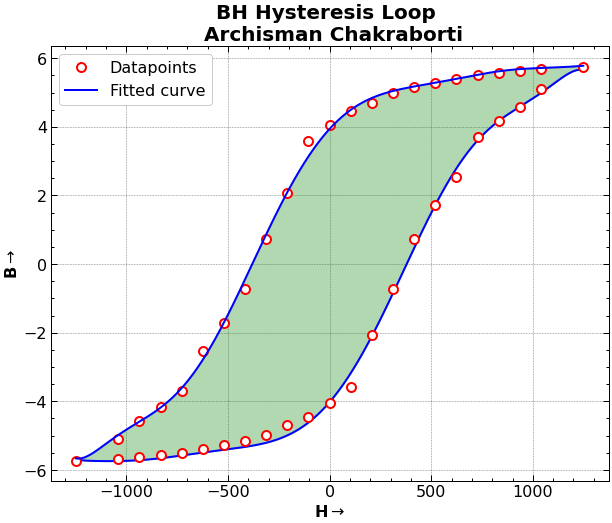

In [28]:
plt.figure(figsize = (10, 8))
plt.plot(H_fit_sym_data, Sigmoid(H_fit_sym_data, *popt_symmetric), 'b')
plt.plot(symmetric_H_vals, symmetric_B_vals, 'ro', markerfacecolor = 'w', markersize = 9,
        markeredgewidth = 2)
plt.plot(H_vals, B_vals, 'ro', markerfacecolor = 'w', markersize = 9,
        markeredgewidth = 2, label = 'Datapoints')
plt.plot(H_fit_data, Sigmoid(H_fit_data, *popt_original), 'b', label = 'Fitted curve')
plt.xlabel(r'H$\rightarrow$', fontweight = 'bold')
plt.ylabel(r'B$\rightarrow$', fontweight = 'bold')

plt.fill_between(H_fit_data, Sigmoid(H_fit_sym_data, *popt_original), 
                 Sigmoid(H_fit_sym_data, *popt_symmetric), color = 'green',
                alpha = 0.3)

plt.title('BH Hysteresis Loop \n Archisman Chakraborti', fontsize = 20, 
          fontweight = 'bold')
plt.legend()

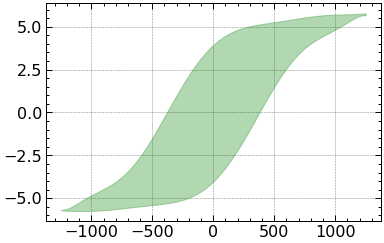